In [69]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [70]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library to perform tsne
from sklearn.manifold import TSNE
#Library for finding mode
from scipy import stats
#Library to load the datset
import h5py as h5
#Library to split dataset
from sklearn.model_selection import train_test_split
#library for neural networks
from sklearn.neural_network import MLPClassifier
#Library to measure accuracy
from sklearn.metrics import accuracy_score
#Library to measure loss
from sklearn.metrics import log_loss

### **A part**

**Loading the Dataset**

In [71]:
#Loading the dataset
data = h5.File("/content/MNIST_Subset.h5", "r")
print(data)
#Keys of the dataset
datasetkeys = data.keys()
print("Keys of Dataset ", datasetkeys)

<HDF5 file "MNIST_Subset.h5" (mode r)>
Keys of Dataset  <KeysViewHDF5 ['X', 'Y']>


In [72]:
#gGetting the Dataset and their labels
data_x = data.get('X')
data_y = data.get('Y')
data_x = np.array(data_x)
print("The Dataset Shape " , data_x.shape)
print(data_x)
#Getting the labels
data_y = np.array(data_y)
print("\nThe Labels Shape ", data_y.shape)
print("labels ",data_y)
#Getting the unique classes
print("\nThe unique Classes ", np.unique(data_y))

The Dataset Shape  (14251, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

The Labels Shape  (14251,)
labels  [9 7 9 ... 7 7 9]

The unique Classes  [7 9]


In [73]:
#Splitting the dataset into test and train with seed = 42
def Question1a(data_x,data_y):
  X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=42)
  print("The X train Shape " , X_train.shape)
  print("The y train Shape " , y_train.shape)
  print("The X test Shape " , X_test.shape)
  print("The y test Shape " , y_test.shape)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = Question1a(data_x,data_y)

The X train Shape  (11400, 28, 28)
The y train Shape  (11400,)
The X test Shape  (2851, 28, 28)
The y test Shape  (2851,)


### **B part**

In [74]:
def Question2b(X_train, X_test, y_train, y_test):
  #making the neural network
  model = MLPClassifier(activation ='logistic',hidden_layer_sizes=(100,50,50))
  #Reshaping into 2 dimensions
  X_train_reshape = X_train.reshape(11400,784)
  X_test_reshape = X_test.reshape(2851,784)
  #Fitting the model
  model.fit(X_train_reshape,y_train)
  #Predicting the labels for train and test data
  pred_train = model.predict(X_train_reshape)
  pred_test = model.predict(X_test_reshape)
  #Predicting the probabilities for test data
  pred_test_prob = model.predict_proba(X_test_reshape)
  #Printing the predicted values
  print("Predicted Train ", pred_train)
  print("Predicted Test ", pred_test)
  print("Predicted Test Probabilities \n", pred_test_prob)
  #Printing the accuracy
  print("\nTrain Accuracy ", accuracy_score(pred_train, y_train)*100)
  print("Test Accuracy ", accuracy_score(pred_test, y_test)*100)
  #Printing the loss for train by using the loss_attribute
  print("Train Loss ", model.loss_*100)
  #Printing the loss of test by using the cross entropy log loss by predicting the probabilities
  print("Test Loss ", log_loss(y_test, pred_test_prob)*100)

Question2b(X_train, X_test, y_train, y_test)

Predicted Train  [9 9 7 ... 7 9 9]
Predicted Test  [9 9 9 ... 9 7 9]
Predicted Test Probabilities 
 [[9.53766089e-04 9.99046234e-01]
 [9.95219727e-04 9.99004780e-01]
 [4.94968392e-04 9.99505032e-01]
 ...
 [1.70120552e-03 9.98298794e-01]
 [9.99710552e-01 2.89447854e-04]
 [8.16280371e-03 9.91837196e-01]]

Train Accuracy  98.6140350877193
Test Accuracy  98.42160645387582
Train Loss  4.57798142345631
Test Loss  4.930295321565025


### **C part**

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)


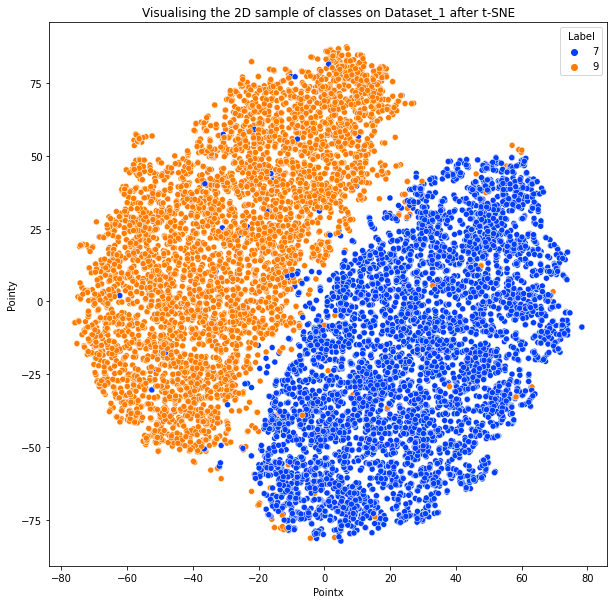

In [75]:
#Reducing into 2 dimensions
def tsne(X_train):
  #Using t-SNE to reduce to 2 dimensions
  tsne_2d = TSNE(n_components = 2)
  print(tsne_2d)
  X_2d = tsne_2d.fit_transform(X_train)
  #Keeping the 2 points as there are 2 dimensions 
  pointx = X_2d[:,0]
  pointy = X_2d[:,1]
  #Storing the Label data
  label = y_train
  #Making a dataframe of the 2 points and labels
  dataframe_1c = pd.DataFrame(list(zip(pointx,pointy,label)), columns=["Pointx","Pointy","Label"])
  #Creating a figure of size 10*10
  plt.figure(figsize=(10,10))
  #Taking 10 colours for printing each class
  palette = sns.color_palette("bright", 2) 
  #Plotting the scatterplot for 2 Points using seaborn
  sns.scatterplot(data=dataframe_1c, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Pointx')
  plt.ylabel('Pointy')
  plt.title("Visualising the 2D sample of classes on Dataset_1 after t-SNE")
  plt.show()
  return dataframe_1c

X_train_reshape = X_train.reshape(11400,784)
X_test_reshape = X_test.reshape(2851,784)
dataframe = tsne(X_train_reshape)

In [76]:
#Separating the xtrain and y train after tsne
X_train_tsne = dataframe.iloc[:,:-1]
y_train_tsne = dataframe.iloc[:,-1]
print(X_train_tsne)
print(y_train_tsne)

          Pointx     Pointy
0       6.651159  54.073795
1     -35.779606 -23.191864
2      28.599932 -45.137104
3     -55.305679  29.521940
4      16.346947 -40.019756
...          ...        ...
11395 -11.613171  48.118843
11396  22.058172   1.576135
11397  52.882053   9.880023
11398 -66.877396  14.557627
11399 -48.752213 -44.361248

[11400 rows x 2 columns]
0        9
1        9
2        7
3        9
4        7
        ..
11395    9
11396    7
11397    7
11398    9
11399    9
Name: Label, Length: 11400, dtype: int64


**alpha = 0.1**

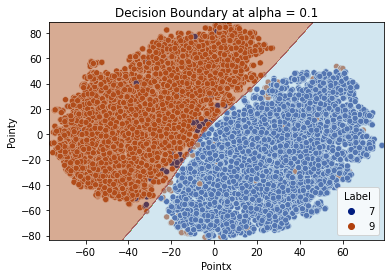

In [80]:
def Question2c_a(X_train_tsne, y_train_tsne, dataframe):
  model = MLPClassifier(activation ='logistic',hidden_layer_sizes=(100,50,50),alpha = 0.1)
  model.fit(X_train_tsne, y_train_tsne)
  palette = sns.color_palette("dark", 2)
  #Plotting the data
  sns.scatterplot(data=dataframe, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Plotting the maximum nad minimum values
  minimum1, maximum1 = X_train_tsne.values[:, 0].min()-1, X_train_tsne.values[:, 0].max()+1
  minimum2, maximum2 = X_train_tsne.values[:, 1].min()-1, X_train_tsne.values[:, 1].max()+1
  #Meshgrid
  x1_gd = np.arange(minimum1, maximum1, 0.1)
  x2_gd = np.arange(minimum2, maximum2, 0.1)
  x_x, y_y = np.meshgrid(x1_gd, x2_gd)
  r_1, r_2 = x_x.flatten(), y_y.flatten()
  r_1, r_2 = r_1.reshape((len(r_1), 1)), r_2.reshape((len(r_2), 1))
  grid_train = np.hstack((r_1,r_2))
  #predicting the value
  y_pred = model.predict(grid_train)
  z_z = y_pred.reshape(x_x.shape)
  #Plotting the decision boundary
  plt.contourf(x_x, y_y, z_z, alpha=0.5,cmap = 'Paired')
  plt.title("Decision Boundary at alpha = 0.1")
  plt.show()

Question2c_a(X_train_tsne, y_train_tsne, dataframe)

**alpha = 0.00001**

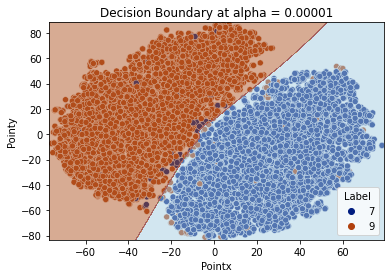

In [81]:
def Question2c_b(X_train_tsne, y_train_tsne, dataframe):
  model = MLPClassifier(activation ='logistic',hidden_layer_sizes=(100,50,50),alpha = 0.00001)
  model.fit(X_train_tsne, y_train_tsne)
  palette = sns.color_palette("dark", 2)
  #Plotting the data
  sns.scatterplot(data=dataframe, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Plotting the maximum nad minimum values
  minimum1, maximum1 = X_train_tsne.values[:, 0].min()-1, X_train_tsne.values[:, 0].max()+1
  minimum2, maximum2 = X_train_tsne.values[:, 1].min()-1, X_train_tsne.values[:, 1].max()+1
  #Meshgrid
  x1_gd = np.arange(minimum1, maximum1, 0.1)
  x2_gd = np.arange(minimum2, maximum2, 0.1)
  x_x, y_y = np.meshgrid(x1_gd, x2_gd)
  r_1, r_2 = x_x.flatten(), y_y.flatten()
  r_1, r_2 = r_1.reshape((len(r_1), 1)), r_2.reshape((len(r_2), 1))
  grid_train = np.hstack((r_1,r_2))
  #predicting the value
  y_pred = model.predict(grid_train)
  z_z = y_pred.reshape(x_x.shape)
  #Plotting the decision boundary
  plt.contourf(x_x, y_y, z_z, alpha=0.5,cmap = 'Paired')
  plt.title("Decision Boundary at alpha = 0.00001")
  plt.show()

Question2c_b(X_train_tsne, y_train_tsne, dataframe)

**alpha = 100**

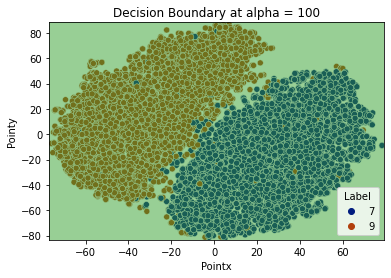

In [84]:
def Question2c_c(X_train_tsne, y_train_tsne, dataframe):
  model = MLPClassifier(activation ='logistic',hidden_layer_sizes=(100,50,50),alpha = 100)
  model.fit(X_train_tsne, y_train_tsne)
  palette = sns.color_palette("dark", 2)
  #Plotting the data
  sns.scatterplot(data=dataframe, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Plotting the maximum nad minimum values
  minimum1, maximum1 = X_train_tsne.values[:, 0].min()-1, X_train_tsne.values[:, 0].max()+1
  minimum2, maximum2 = X_train_tsne.values[:, 1].min()-1, X_train_tsne.values[:, 1].max()+1
  #Meshgrid
  x1_gd = np.arange(minimum1, maximum1, 0.1)
  x2_gd = np.arange(minimum2, maximum2, 0.1)
  x_x, y_y = np.meshgrid(x1_gd, x2_gd)
  r_1, r_2 = x_x.flatten(), y_y.flatten()
  r_1, r_2 = r_1.reshape((len(r_1), 1)), r_2.reshape((len(r_2), 1))
  grid_train = np.hstack((r_1,r_2))
  #predicting the value
  y_pred = model.predict(grid_train)
  z_z = y_pred.reshape(x_x.shape)
  #Plotting the decision boundary
  plt.contourf(x_x, y_y, z_z, alpha=0.5,cmap = 'Paired')
  plt.title("Decision Boundary at alpha = 100")
  plt.show()

Question2c_c(X_train_tsne, y_train_tsne, dataframe)